### Writing the SVM class (Hinge Loss calculation & Gradient Descent optimization)

In [1]:
import numpy as np

class SVM:
    
    def __init__(self, C=1.0):
        # C = error term
        self.C = C
        # W = weights
        self.w = 0
        # b = Bias
        self.b = 0
        
        
    # Hinge Loss Function/Calculation
    def hingeloss(self, w, b, x, y):
        
        # Regularizer term
        reg = 0.5 * (w * w)
        
        for i in range(x.shape[0]):
            
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b)
            
            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term)
            
        return loss[0][0]
    
    
    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        
        # The number of features in X
        number_of_features = X.shape[1]
        
        # The number of Samples in X
        number_of_samples = X.shape[0]
        
        c = self.C
        
        # Creating ids from 0 to number_of_samples-1
        ids = np.arange(number_of_samples)
        
        # Shuffling the samples randomly
        np.random.shuffle(ids)
        
        # creating an array of zeroes
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []
        
        # Gradient Descent Logic
        for i in range(epochs):
            
            # Calculating the Hinge Loss
            hinge_loss = self.hingeloss(w, b, X, Y)
            
            # Appending all loses
            losses.append(hinge_loss)
            
            # Strating from 0 to the number of samples with batch_size as interval
            for batch_initial in range(0, number_of_samples, batch_size):
                
                gradw = 0
                gradb = 0
                
                for j in range(batch_initial, batch_initial + batch_size):
                    
                    if j < number_of_samples:
                        
                        x = ids[j]
                        
                        ti = Y[x] * (np.dot(w, X[x].T) + b)
                        
                        if ti>1:
                            gradw = gradw + 0
                            gradb = gradb + 0
                            
                        else:
                            # Calculating the gradients
                            # reg + self.C * max(0, 1-(y[i] * ((np.dot(W, x[i])) + b)))
                            
                            # derivative with respect to w
                            gradw = gradw + c * Y[x] * X[x]
                            # derivative with respect to b
                            gradb = gradb + c * Y[x]
                
                # Updating Weights and bias
                w = w - learning_rate * w + learning_rate *  gradw
                b = b + learning_rate * gradb
                
        self.w = w
        self.b = b
        
        return self.w, self.b, losses
    
    
    def predict(self, X):
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)
        

### Creating random dataset

In [2]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [3]:
# Creating dataset
X, y = datasets.make_blobs(

        n_samples = 100, # Number of samples
        n_features = 2, # Features
        centers = 2,
        cluster_std = 1,
        random_state=40
    )

In [4]:
# Classes 1 and -1
y = np.where(y == 0, -1, 1)

### Splitting the dataset

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

### Training the SVM model

In [6]:
svm = SVM()

In [7]:
w, b, losses = svm.fit(X_train, y_train)

In [8]:
w

array([[0.44477983, 0.15109913]])

In [9]:
b

0.05700000000000004

In [10]:
losses

[1.0,
 0.07021230572002345,
 0.04337669810121732,
 0.048996155149764964,
 0.055660308995054905,
 0.05991419317398984,
 0.0639300645342227,
 0.06511998402453194,
 0.06774286653318795,
 0.06885396110405564,
 0.07154640211008972,
 0.07268425165224654,
 0.07382992662872023,
 0.07498340129647202,
 0.07614464997402351,
 0.07731364704132343,
 0.07849036693961484,
 0.07967478417130242,
 0.08086687329982029,
 0.0837698706169017,
 0.08498792231844662,
 0.08621353449331884,
 0.08744668203277349,
 0.08887537349247536,
 0.09012464505107068,
 0.09138137324874177,
 0.09283771488249136,
 0.09411040192233192,
 0.09539046745749956,
 0.0968742040933603,
 0.09648443169864133,
 0.09797551376518052,
 0.09947652110832368,
 0.09907892862779541,
 0.10058721765583321,
 0.10018629791733229,
 0.10170184176003029,
 0.10149853977835199,
 0.10129564419733506,
 0.10109315420458459,
 0.10089106898932963,
 0.10068938774241996,
 0.10048810965632285,
 0.10028723392511986,
 0.10008675974450355,
 0.0998866863117743,
 0.099

### Making predictions and testing accuracy

In [11]:
prediction = svm.predict(X_test)

In [13]:
# Loss value
lss = losses.pop()

print("Loss:", lss)
print("Actual:",y_test)
print("Prediction:", prediction)
print("Accuracy:", accuracy_score(prediction, y_test))
print("w, b:", [w, b])

Loss: 0.09931119696257638
Actual: [-1  1 -1 -1  1  1  1  1 -1  1 -1 -1  1  1 -1 -1  1 -1  1 -1  1  1 -1  1
  1  1 -1 -1 -1 -1  1 -1 -1  1  1 -1  1 -1 -1  1  1  1  1  1  1 -1  1  1
  1  1]
Prediction: [-1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1.  1. -1.
  1. -1.  1.  1. -1.  1.  1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1. -1.
  1. -1. -1.  1.  1.  1.  1.  1.  1. -1.  1.  1.  1.  1.]
Accuracy: 1.0
w, b: [array([[0.44477983, 0.15109913]]), 0.05700000000000004]


### Visualization of dataset

In [14]:
# Visualizing the scatter plot of the dataset
def visualize_dataset():
    plt.scatter(X[:, 0], X[:, 1], c=y)

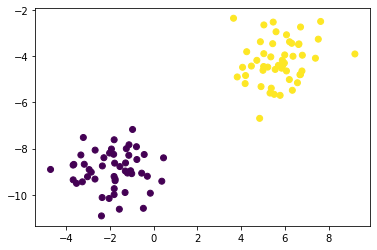

In [16]:
visualize_dataset()

### Visualization of SVM on the test set

In [18]:
# Visualizing SVM
def visualize_svm():
    
    def get_hyperplane_value(x, w, b, offset):
        return ( -w[0][0] * x + b + offset) / w[0][1]
    
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    plt.scatter(X_test[:,0], X_test[:,1], marker="o", c=y_test)
    
    x0_1 = np.amin(X_test[:, 0])
    x0_2 = np.amax(X_test[:, 0])
    
    x1_1 = get_hyperplane_value(x0_1, w, b, 0)
    x1_2 = get_hyperplane_value(x0_2, w, b, 0)
    
    x1_1_m = get_hyperplane_value(x0_1, w, b, -1)
    x1_2_m = get_hyperplane_value(x0_2, w, b, -1)
    
    x1_1_p = get_hyperplane_value(x0_1, w, b, 1)
    x1_2_p = get_hyperplane_value(x0_2, w, b, 1)
    
    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")
    
    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])
    
    plt.show()

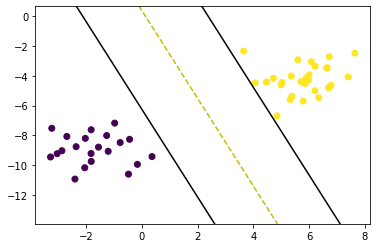

In [19]:
visualize_svm()